In [1]:
import pandas as pd
from apriori import Apriori, TransactionEncoder
import statistics
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
original_store_data = pd.read_csv("../Dataset/SampleSuperstore.csv")

In [3]:
print(original_store_data.shape)
original_store_data.head()

(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print(original_store_data['Ship Mode'].unique())
print(original_store_data['Segment'].unique())
print(original_store_data['Country'].unique())
print(original_store_data['Category'].unique())
print(original_store_data['Sub-Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [5]:
algorithm = Apriori()
try:
    algorithm.valid_input_check(store_data)
except:
    print("The allowed values for a DataFrame are True, False, 0, 1. Found value Second Class")

The allowed values for a DataFrame are True, False, 0, 1. Found value Second Class


#### Changing to a suitable dataframe

In [27]:
store_data = original_store_data[['Postal Code', 'Sub-Category', 'Quantity']]
store_data = store_data.groupby(['Postal Code', 'Sub-Category']).sum()
# Convert quantities to 0/1
store_data['Quantity'] =  (store_data['Quantity']>0).astype(int)
# pivot table and convert it to sparse data
pivoted_store_data = store_data.pivot_table(index='Postal Code', columns='Sub-Category', values='Quantity', fill_value=0)
sparse_store_data = pivoted_store_data.astype(pd.SparseDtype(int, fill_value=0))

In [28]:
print(sparse_store_data.shape)
sparse_store_data.head()

(631, 17)


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Postal Code,,,,,,,,,,,,,,,,,
1040,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1453,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
1752,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1810,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1841,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1


In [29]:
try:
    algorithm.valid_input_check(sparse_store_data)
except:
    print("The allowed values for a DataFrame are True, False, 0, 1. Found value Second Class")

## Apriori Algorithm and extract frequent items as features 

In [30]:
# check for the mean occurence for each combination 
item_count = algorithm.apriori(df=sparse_store_data, use_colnames=True, verbose=1, count=True, min_support=0.001)

Processing 17 combinations | Sampling itemset size 176531


In [31]:
print(f"Total number of combinations of all itemsets: {len(item_count)}")
average_occurence = round(sum(item_count['count'])/len(item_count), 2)
median_occurence = statistics.median(item_count['count'])
percentile_99 = np.percentile(item_count['count'], 99)
print(f"Average Occurence of each combination: {average_occurence}")
print(f"Median Occurence of each combination: {median_occurence}")
print(f"99 Percentile Occurence of each combination: {percentile_99}")

Total number of combinations of all itemsets: 131071
Average Occurence of each combination: 26.62
Median Occurence of each combination: 23.0
75 Percentile Occurence of each combination: 74.0


In [32]:
item_count.head()

,count,itemsets
0,292.0,(Accessories)
1,223.0,(Appliances)
2,296.0,(Art)
3,402.0,(Binders)
4,138.0,(Bookcases)


In [ ]:
new_col = item_count[item_count['count']>=74]['Itemset']

In [12]:
new_df = pd.DataFrame(index=sparse_store_data.index)
new_df[new_col] = 1
for itemset in tqdm(new_col):
    for i in sparse_store_data.index:
        for item in itemset:
            if sparse_store_data.loc[i][item] == 0:
                new_df.at[i, itemset] = 0
                break

NameError: name 'new_col' is not defined

In [4]:
original_store_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [51]:
# Adding Label to the new table with frequent items as features
final_df = new_df.merge(original_store_data[['Postal Code', 'Segment']], how='left', on='Postal Code').set_index('Postal Code')
"""
Combining label if multiple labels are found for the same Postal Code
eg: Postal 123 contains different transactions(rows) with different 'Segment' --> consumer and corporate, 
    it will be combined to one row with 'Segment' --> consumer, corporate
"""
final_df = final_df.groupby('Postal Code').agg({
    **{col: 'max' for col in final_df.columns if col not in ['Postal Code', 'Segment']},
    'Segment': lambda x: ', '.join(sorted(set(x)))
}).reset_index()
final_df.rename(columns={"Segment": "Label"}, inplace=True)

In [53]:
# Label Transform the Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Label'] = le.fit_transform(final_df['Label'])

In [88]:
# final_df.to_csv("../Result/SuperStoreFrequentFeatures1.csv")
print(final_df.shape)
final_df.head()

(631, 1257)


,(Accessories),(Appliances),(Art),(Binders),(Bookcases),(Chairs),(Envelopes),(Fasteners),(Furnishings),(Labels),...,"(Storage, Paper, Chairs, Furnishings, Art, Phones, Binders)","(Tables, Storage, Paper, Furnishings, Art, Phones, Binders)","(Tables, Storage, Paper, Chairs, Furnishings, Phones, Binders)","(Paper, Chairs, Phones, Furnishings, Art, Accessories, Appliances, Binders)","(Storage, Paper, Phones, Furnishings, Art, Accessories, Appliances, Binders)","(Storage, Paper, Chairs, Phones, Furnishings, Accessories, Appliances, Binders)","(Storage, Paper, Chairs, Furnishings, Art, Accessories, Phones, Binders)","(Tables, Storage, Paper, Furnishings, Art, Accessories, Phones, Binders)","(Storage, Paper, Chairs, Phones, Furnishings, Art, Appliances, Binders)",Label
Postal Code,,,,,,,,,,,,,,,,,,,,,
1040,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1453,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1752,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1810,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1841,0,1,1,1,0,1,0,1,1,1,...,1,1,1,0,0,0,0,0,1,2


### Data Preprocessing for Clustering Items

In [80]:
new_df = pd.DataFrame(index=sparse_store_data.columns)
new_df[new_col] = 1
for itemset in tqdm(new_col):
    for item in sparse_store_data.columns:
        if item not in itemset:
            new_df.at[item, itemset] = 0


100%|██████████| 1256/1256 [00:00<00:00, 5749.86it/s]


In [85]:
final_df2 = new_df.merge(original_store_data[['Sub-Category', 'Category']], how='left', on='Sub-Category').set_index('Sub-Category').drop_duplicates(keep='first')
final_df2.rename(columns={"Category": "Label"}, inplace=True)

le = LabelEncoder()
final_df2['Label'] = le.fit_transform(final_df2['Label'])

In [89]:
# final_df2.to_csv("../Result/SuperStoreFrequentFeatures2.csv")
print(final_df2.shape)
final_df2.head()

(17, 1257)


,(Accessories),(Appliances),(Art),(Binders),(Bookcases),(Chairs),(Envelopes),(Fasteners),(Furnishings),(Labels),...,"(Storage, Paper, Chairs, Furnishings, Art, Phones, Binders)","(Tables, Storage, Paper, Furnishings, Art, Phones, Binders)","(Tables, Storage, Paper, Chairs, Furnishings, Phones, Binders)","(Paper, Chairs, Phones, Furnishings, Art, Accessories, Appliances, Binders)","(Storage, Paper, Phones, Furnishings, Art, Accessories, Appliances, Binders)","(Storage, Paper, Chairs, Phones, Furnishings, Accessories, Appliances, Binders)","(Storage, Paper, Chairs, Furnishings, Art, Accessories, Phones, Binders)","(Tables, Storage, Paper, Furnishings, Art, Accessories, Phones, Binders)","(Storage, Paper, Chairs, Phones, Furnishings, Art, Appliances, Binders)",Label
Sub-Category,,,,,,,,,,,,,,,,,,,,,
Accessories,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,2
Appliances,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1,1
Art,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,1,1,1
Binders,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Bookcases,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Clustering Different Users (based on postal code)

### K Means Clustering (K=7)

In [103]:
print("Number of unique labels: ", len(final_df['Label'].unique()))

Number of unique labels:  7


In [104]:
from sklearn.cluster import KMeans

X = final_df.iloc[:, :-1]
kmeans = KMeans(n_clusters=len(final_df['Label'].unique()), random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_

In [105]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(final_df['Label'] , kmeans_results)}")


Silhouette Score: 0.5037051122002923
Calinski Harabasz Score: 226.16801153703938
Davies Bouldin Score: 1.7925466409131396
Adjusted Rand Index: -0.03771071865334091


#### t-SNE

In [106]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='pca', perplexity=25).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

(631, 2)

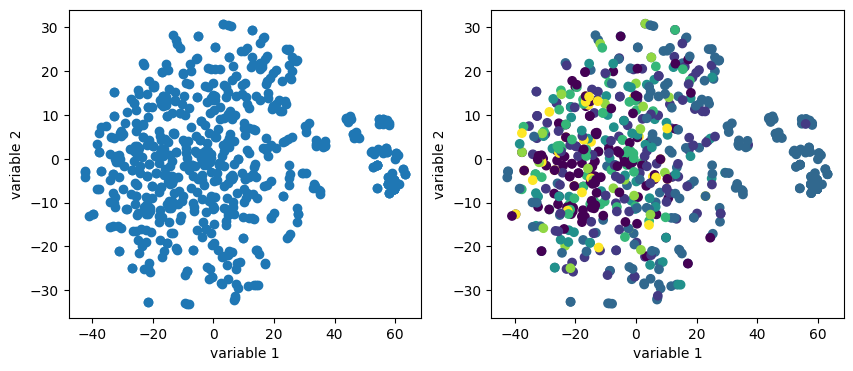

In [107]:
# t-SNE does not result in clear clusters too

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], cmap='viridis')
axes[0].set_xlabel("variable 1")
axes[0].set_ylabel("variable 2")
axes[1].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=final_df['Label'], cmap='viridis')
axes[1].set_xlabel("variable 1")
axes[1].set_ylabel("variable 2")
plt.show()

In [108]:
kmeans = KMeans(n_clusters=len(final_df['Label'].unique()), random_state=0, init='k-means++').fit(X_embedded)
kmeans_results = kmeans.labels_

In [109]:
print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(final_df['Label'] , kmeans_results)}")


Silhouette Score: -0.036349671816071995
Calinski Harabasz Score: 145.18465331283468
Davies Bouldin Score: 4.086854850660862
Adjusted Rand Index: 0.07773463814443561


## Clustering Different Items (based on sub-category)

### K Means Clustering (K=3)

In [155]:
print("Number of unique labels: ", len(final_df2['Label'].unique()))

Number of unique labels:  3


In [156]:
X = final_df2.iloc[:, :-1]
kmeans = KMeans(n_clusters=len(final_df2['Label'].unique()), random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_

In [157]:
print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(final_df2['Label'] , kmeans_results)}")

Silhouette Score: 0.1264376331046648
Calinski Harabasz Score: 1.694547273007476
Davies Bouldin Score: 1.823416531490898
Adjusted Rand Index: -0.09863945578231292


#### t-SNE

In [158]:
X_embedded = TSNE(n_components=2, init='pca', perplexity=4).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

(17, 2)

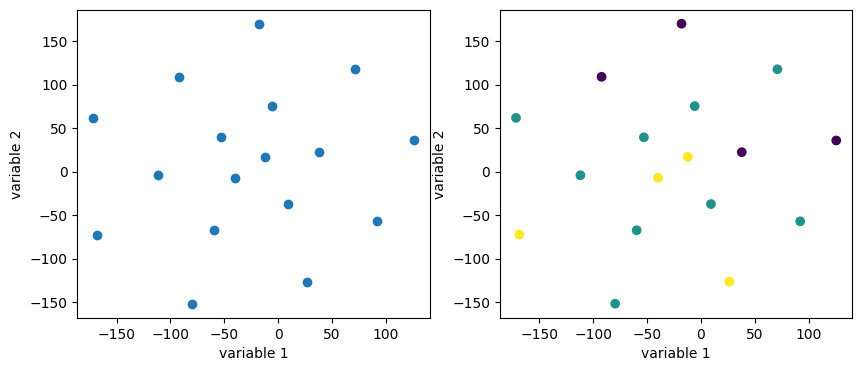

In [159]:
# t-SNE does not result in clear clusters too

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], cmap='viridis')
axes[0].set_xlabel("variable 1")
axes[0].set_ylabel("variable 2")
axes[1].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=final_df2['Label'], cmap='viridis')
axes[1].set_xlabel("variable 1")
axes[1].set_ylabel("variable 2")
plt.show()

In [160]:
kmeans = KMeans(n_clusters=len(final_df2['Label'].unique()), random_state=0, init='k-means++').fit(X_embedded)
kmeans_results = kmeans.labels_

In [161]:
print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(final_df2['Label'] , kmeans_results)}")

Silhouette Score: -0.04661026612912735
Calinski Harabasz Score: 0.9866271289467418
Davies Bouldin Score: 3.2367727199266034
Adjusted Rand Index: -0.003937007874015748


# Using another dataset to cluster items

In [18]:
df_orders = pd.read_csv("../Dataset/instacart-market-basket-analysis/orders.csv")
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
# Count unique values in eval_set
df_orders['eval_set'].value_counts()


eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

In [20]:
df_products = pd.read_csv("../Dataset/instacart-market-basket-analysis/products.csv")
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
print("Number of unique products: ", len(df_products['product_name'].unique()))

Number of unique products:  49688


In [22]:
# Aisle df
df_aisles = pd.read_csv("../Dataset/instacart-market-basket-analysis/aisles.csv")
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [23]:
# Department df
df_departments = pd.read_csv("../Dataset/instacart-market-basket-analysis/departments.csv")
df_departments.head()
# unique values
print("Number of unique aisles: ", len(df_aisles['aisle'].unique()))
print("Number of unique departments: ", len(df_departments['department'].unique()))

Number of unique aisles:  134
Number of unique departments:  21


In [24]:
df_orders_prior = pd.read_csv("../Dataset/instacart-market-basket-analysis/order_products__prior.csv")
df_orders_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [25]:
df_merged = df_orders_prior.merge(df_products, how='left', on='product_id')
df_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [26]:
df_market_basket = df_merged.groupby(['order_id']).size().reset_index(name='count')
df_market_basket.head()

,order_id,count
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


In [27]:
#from mlxtend.frequent_patterns import apriori

# Convert df_merged into transactional format
transactional_data = df_merged.groupby(['order_id'])['product_name'].apply(list).reset_index(name='products')

# Apply Apriori algorithm
#frequent_itemsets = algorithm.apriori(transactional_data, min_support=0.001, use_colnames=True)

# Print the frequent itemsets
#print(frequent_itemsets)


In [28]:
transactional_data.head()

,order_id,products
0,2,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
1,3,[Total 2% with Strawberry Lowfat Greek Straine...
2,4,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
3,5,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."
4,6,"[Cleanse, Dryer Sheets Geranium Scent, Clean D..."


In [15]:
!python apriori.py

In [11]:
from apriori import TransactionEncoder

In [29]:
te = TransactionEncoder()
te_ary = te.fit(transactional_data['products']).transform(transactional_data['products'], sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
sparse_df.head()

,#2 Coffee Filters,#2 Cone White Coffee Filters,#2 Mechanical Pencils,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,'Swingtop' Premium Lager,(70% Juice!) Mountain Raspberry Juice Squeeze,+Energy Black Cherry Vegetable & Fruit Juice,".5\"" Waterproof Tape",0 Calorie Acai Raspberry Water Beverage,...,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Do the same above for aise and department
df_merged_aisle = df_merged.merge(df_aisles, how='left', on='aisle_id')
df_merged_aisle.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [69]:
# Convert df_merged_aisle into transactional format
transactional_data_aisle = df_merged_aisle.groupby(['order_id'])['aisle'].apply(list).reset_index(name='aisles')

te = TransactionEncoder()
te_ary = te.fit(transactional_data_aisle['aisles']).transform(transactional_data_aisle['aisles'], sparse=True)
sparse_df_aisle = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
sparse_df_aisle.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Do the same above for department
df_merged_department = df_merged.merge(df_departments, how='left', on='department_id')
df_merged_department.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,Garlic Powder,104,13,pantry
3,2,45918,4,1,Coconut Butter,19,13,pantry
4,2,30035,5,0,Natural Sweetener,17,13,pantry


In [71]:
sparse_df_aisle

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3214872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# Convert df_merged_department into transactional format
transactional_data_department = df_merged_department.groupby(['order_id'])['department'].apply(list)



In [134]:
transactional_data_department

order_id
2          [dairy eggs, produce, pantry, pantry, pantry, ...
3          [dairy eggs, dairy eggs, produce, produce, dai...
4          [bakery, personal care, snacks, breakfast, bre...
5          [produce, pantry, deli, produce, dairy eggs, h...
6                          [beverages, household, household]
                                 ...                        
3421079                                      [personal care]
3421080    [dairy eggs, frozen, beverages, produce, produ...
3421081    [snacks, bakery, pantry, dairy eggs, canned go...
3421082    [meat seafood, dairy eggs, produce, produce, d...
3421083    [snacks, babies, babies, babies, babies, house...
Name: department, Length: 3214874, dtype: object

In [112]:
te = TransactionEncoder()
te_ary = te.fit(transactional_data_department).transform(transactional_data_department, sparse=True)
sparse_df_department = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_, index=transactional_data_department.index)
sparse_df_department.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0,0,0,1,0,0,0,1,1,1,...,1,1,1,0,0,1,1,0,1,1
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [113]:
sparse_df_department

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0,0,0,1,0,0,0,1,1,1,...,1,1,1,0,0,1,1,0,1,1
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3421080,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3421081,0,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [114]:
# Apply Apriori algorithm on sparse_df_aisle
#frequent_itemsets_aisle = algorithm.apriori(sparse_df_aisle, min_support=0.001, use_colnames=True)
# Random sample of 1000 rows
algorithm = Apriori()
sample = sparse_df_department.sample(n=10000, random_state=1)
frequent_itemsets_aisle = algorithm.apriori(df=sample, use_colnames=True, verbose=1, count=False, min_support=0.2)
# Print the frequent itemsets
print(frequent_itemsets_aisle)

Processing 12 combinations | Sampling itemset size 4
    support                          itemsets
0    0.2670                          (bakery)
1    0.4487                       (beverages)
2    0.2090                    (canned goods)
3    0.6843                      (dairy eggs)
4    0.2353                            (deli)
5    0.3667                          (frozen)
6    0.3515                          (pantry)
7    0.7518                         (produce)
8    0.4246                          (snacks)
9    0.2193              (dairy eggs, bakery)
10   0.2231                 (produce, bakery)
11   0.3207           (dairy eggs, beverages)
12   0.3321              (beverages, produce)
13   0.2235               (snacks, beverages)
14   0.2825              (dairy eggs, frozen)
15   0.2735              (pantry, dairy eggs)
16   0.5588             (dairy eggs, produce)
17   0.3158              (snacks, dairy eggs)
18   0.2014                   (produce, deli)
19   0.2987                

In [76]:
# Convert frequent_itemsets_aisle into a DataFrame with frequent itemsets as features
new_df = pd.DataFrame(index=sparse_df_department.columns)
new_col = frequent_itemsets_aisle['itemsets'].tolist()
new_df[new_col] = 1
for itemset in tqdm(new_col):
    for item in sparse_df_department.columns:
        if item not in itemset:
            new_df.at[item, itemset] = 0

100%|██████████| 26/26 [00:00<00:00, 1338.27it/s]


In [77]:
new_df.head()

,(bakery),(beverages),(canned goods),(dairy eggs),(deli),(frozen),(pantry),(produce),(snacks),"(dairy eggs, bakery)",...,"(dairy eggs, produce)","(snacks, dairy eggs)","(produce, deli)","(produce, frozen)","(pantry, produce)","(snacks, produce)","(beverages, dairy eggs, produce)","(dairy eggs, produce, frozen)","(pantry, dairy eggs, produce)","(snacks, dairy eggs, produce)"
alcohol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
babies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bakery,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
beverages,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
breakfast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
new_df.tail()

,(bakery),(beverages),(canned goods),(dairy eggs),(deli),(frozen),(pantry),(produce),(snacks),"(dairy eggs, bakery)",...,"(dairy eggs, produce)","(snacks, dairy eggs)","(produce, deli)","(produce, frozen)","(pantry, produce)","(snacks, produce)","(beverages, dairy eggs, produce)","(dairy eggs, produce, frozen)","(pantry, dairy eggs, produce)","(snacks, dairy eggs, produce)"
pantry,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
personal care,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pets,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
produce,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,1,1,1,1,1,1
snacks,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [115]:
# Use frequent_itemsets on sparse_df_department 
new_df = pd.DataFrame(index=sample.index)
new_col = frequent_itemsets_aisle['itemsets'].tolist()
new_df[new_col] = 1
for itemset in tqdm(new_col):
    for i in sample.index:
        for item in itemset:
            if sample.loc[i][item] == 0:
                new_df.at[i, itemset] = 0
                break

new_df.head()


100%|██████████| 26/26 [03:38<00:00,  8.40s/it]


,(bakery),(beverages),(canned goods),(dairy eggs),(deli),(frozen),(pantry),(produce),(snacks),"(dairy eggs, bakery)",...,"(dairy eggs, produce)","(snacks, dairy eggs)","(produce, deli)","(produce, frozen)","(pantry, produce)","(snacks, produce)","(beverages, dairy eggs, produce)","(dairy eggs, produce, frozen)","(pantry, dairy eggs, produce)","(snacks, dairy eggs, produce)"
order_id,,,,,,,,,,,,,,,,,,,,,
2513124,0,0,0,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
551298,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
165311,1,1,0,1,1,0,0,1,1,1,...,1,1,1,0,0,1,1,0,0,1
76294,1,0,0,1,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
90358,1,1,0,1,0,0,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0


In [116]:
print(sample.index, new_df.index, sample) 

Index([2513124,  551298,  165311,   76294,   90358, 2528724, 1426965, 3282996,
       2259117,  682112,
       ...
       1185662, 3094198, 2439675, 1231239,  710634, 2361130, 2241752, 2341897,
       1336263,  748308],
      dtype='int64', name='order_id', length=10000) Index([2513124,  551298,  165311,   76294,   90358, 2528724, 1426965, 3282996,
       2259117,  682112,
       ...
       1185662, 3094198, 2439675, 1231239,  710634, 2361130, 2241752, 2341897,
       1336263,  748308],
      dtype='int64', name='order_id', length=10000)           alcohol  babies  bakery  beverages  breakfast  bulk  canned goods  \
order_id                                                                      
2513124         0       0       0          0          0     0             0   
551298          0       0       0          0          1     0             0   
165311          0       0       1          1          0     0             0   
76294           0       0       1          0          0     0

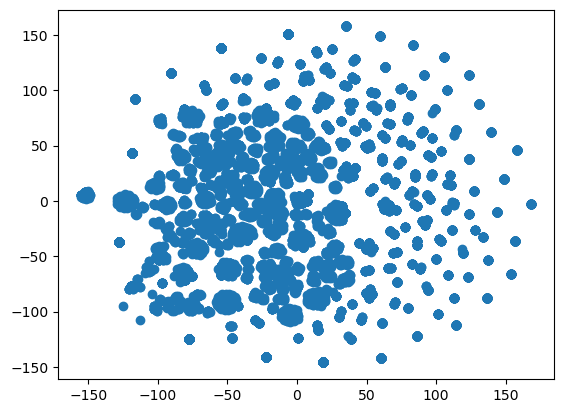

In [80]:
# Show the rows in a scatter plot
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='pca', perplexity=25).fit_transform(new_df)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], cmap='viridis')

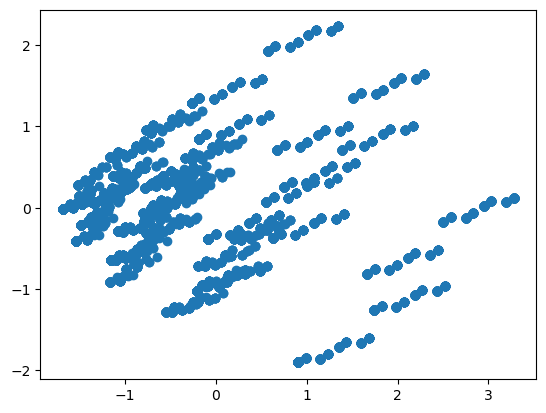

In [40]:
# Do the same with pca
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(new_df)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], cmap='viridis')

In [118]:
# Add order hour of day to the new_df on new_df index and df_orders order_id
new_df = new_df.merge(df_orders[['order_id', 'order_hour_of_day']], how='left', left_index=True, right_on='order_id').set_index('order_id')
new_df.head()

,(bakery),(beverages),(canned goods),(dairy eggs),(deli),(frozen),(pantry),(produce),(snacks),"(dairy eggs, bakery)",...,"(snacks, dairy eggs)","(produce, deli)","(produce, frozen)","(pantry, produce)","(snacks, produce)","(beverages, dairy eggs, produce)","(dairy eggs, produce, frozen)","(pantry, dairy eggs, produce)","(snacks, dairy eggs, produce)",order_hour_of_day
order_id,,,,,,,,,,,,,,,,,,,,,
2513124,0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,20
551298,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9
165311,1,1,0,1,1,0,0,1,1,1,...,1,1,0,0,1,1,0,0,1,12
76294,1,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,22
90358,1,1,0,1,0,0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,17


In [119]:
new_df['order_hour_of_day'].value_counts()

order_hour_of_day
13    869
14    863
15    854
10    837
11    784
16    782
12    780
9     763
17    670
18    534
8     512
19    393
20    294
7     254
21    231
22    194
23    124
6      96
0      63
2      31
5      25
1      25
3      12
4      10
Name: count, dtype: int64

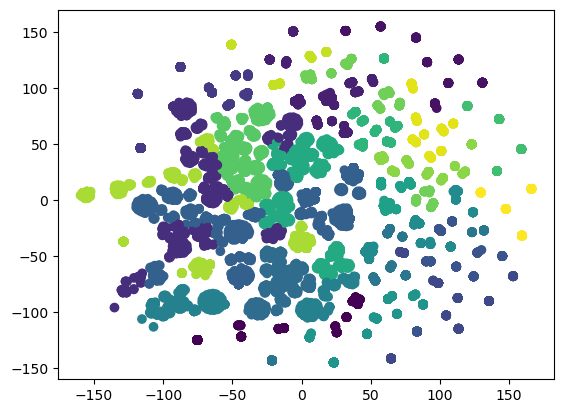

In [120]:
# Create 24 clusters
from sklearn.cluster import KMeans

X = new_df.iloc[:, :-1]
kmeans = KMeans(n_clusters=24, random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_

# Show the rows in a scatter plot
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='pca', perplexity=25).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=kmeans_results, cmap='viridis')

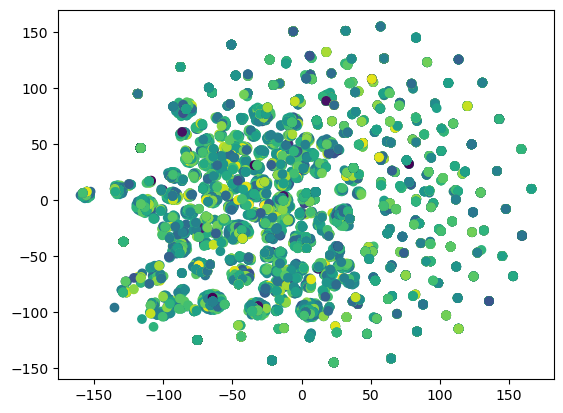

In [121]:
# Plot the scatter plot using order hour of day as label

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=new_df['order_hour_of_day'], cmap='viridis')

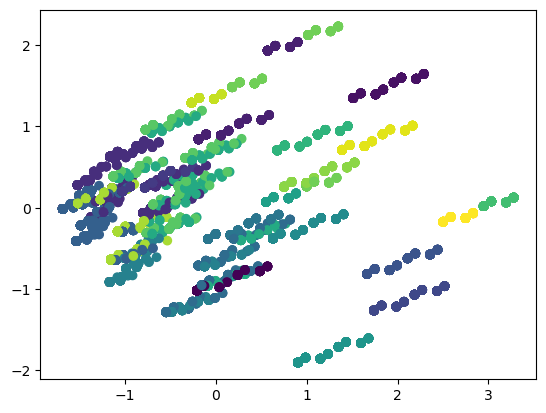

In [122]:
# Use pca and then plot

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=kmeans_results, cmap='viridis')

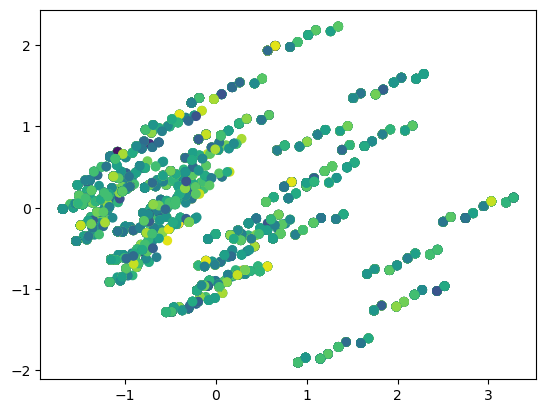

In [123]:
# plot using order hour of day as label

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=new_df['order_hour_of_day'], cmap='viridis')

In [124]:
# Calculate the silhouette score
from sklearn.metrics import silhouette_score

print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")

# Calculate the calinski harabasz score
from sklearn.metrics import calinski_harabasz_score

print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")

# Calculate the davies bouldin score
from sklearn.metrics import davies_bouldin_score

print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")

# Calculate the adjusted rand index
from sklearn.metrics import adjusted_rand_score

print(f"Adjusted Rand Index: {adjusted_rand_score(new_df['order_hour_of_day'] , kmeans_results)}")

Silhouette Score: 0.32914193306945966
Calinski Harabasz Score: 1175.931790678181
Davies Bouldin Score: 1.2937988007247192
Adjusted Rand Index: 0.0005749649671505163


In [125]:
# Lets create a mapping of the hours into 4 categories
# 0-6: Night
# 6-12: Morning
# 12-18: Afternoon
# 18-24: Evening

new_df['order_hour_of_day'].value_counts()

new_df['order_hour_of_day_grouping'] = new_df['order_hour_of_day'].apply(lambda x: 0 if x<6 else (1 if x<12 else (2 if x<18 else 3)))

new_df['order_hour_of_day_grouping'].value_counts()

# Create 4 clusters
from sklearn.cluster import KMeans

X = new_df.iloc[:, :-2]
kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_

# Calculate the silhouette score
from sklearn.metrics import silhouette_score

print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")

# Calculate the calinski harabasz score
from sklearn.metrics import calinski_harabasz_score

print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")

# Calculate the davies bouldin score
from sklearn.metrics import davies_bouldin_score

print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")

# Calculate the adjusted rand index
from sklearn.metrics import adjusted_rand_score

print(f"Adjusted Rand Index: {adjusted_rand_score(new_df['order_hour_of_day_grouping'] , kmeans_results)}")




Silhouette Score: 0.24037603733083096
Calinski Harabasz Score: 1906.2525372592834
Davies Bouldin Score: 1.7547053776518957
Adjusted Rand Index: 0.002609208566414797


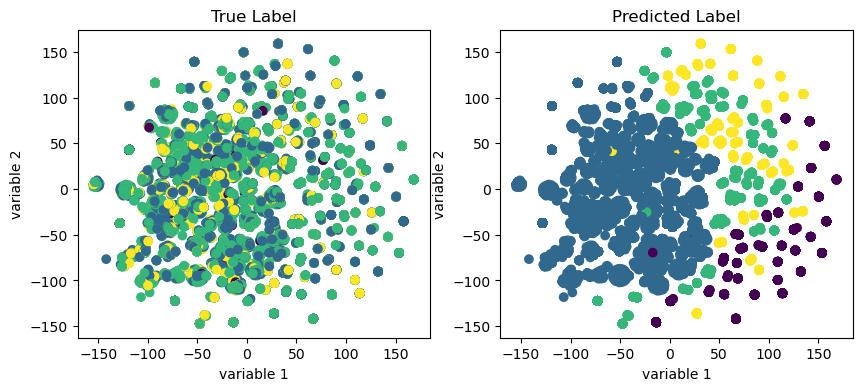

In [126]:
# Scatter plot using tsne
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='pca', perplexity=25).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

# Plot two graphs, one using true label and one using predicted label
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=new_df['order_hour_of_day_grouping'] ,cmap='viridis')
axes[0].set_xlabel("variable 1")
axes[0].set_ylabel("variable 2")
axes[0].set_title("True Label")
axes[1].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=kmeans_results, cmap='viridis')
axes[1].set_xlabel("variable 1")
axes[1].set_ylabel("variable 2")
axes[1].set_title("Predicted Label")

plt.show()


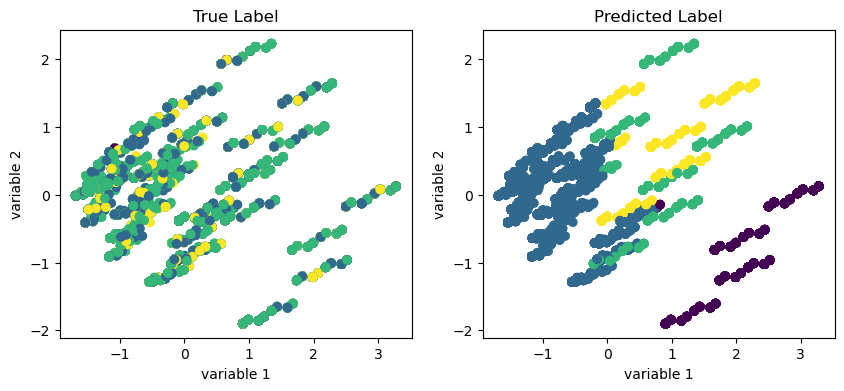

In [127]:
# Scatter plot using pca
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

# Plot two graphs, one using true label and one using predicted label
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=new_df['order_hour_of_day_grouping'] ,cmap='viridis')
axes[0].set_xlabel("variable 1")
axes[0].set_ylabel("variable 2")
axes[0].set_title("True Label")

axes[1].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=kmeans_results, cmap='viridis')
axes[1].set_xlabel("variable 1")
axes[1].set_ylabel("variable 2")
axes[1].set_title("Predicted Label")

plt.show()

In [135]:
# reduce the number of frequent itemsets
# Use frequent_itemsets on sparse_df_department

# Apply Apriori algorithm on sparse_df_aisle
#frequent_itemsets_aisle = algorithm.apriori(sparse_df_aisle, min_support=0.001, use_colnames=True)
# Random sample of 1000 rows
algorithm = Apriori()
sample = sparse_df_department.sample(n=10000, random_state=1)
frequent_itemsets_aisle = algorithm.apriori(df=sample, use_colnames=True, verbose=1, count=False, min_support=0.1)
# Print the frequent itemsets
print(frequent_itemsets_aisle)

Processing 20 combinations | Sampling itemset size 54
     support                                  itemsets
0     0.2670                                  (bakery)
1     0.4487                               (beverages)
2     0.1625                               (breakfast)
3     0.2090                            (canned goods)
4     0.6843                              (dairy eggs)
..       ...                                       ...
97    0.1461  (beverages, snacks, dairy eggs, produce)
98    0.1032       (produce, snacks, dairy eggs, deli)
99    0.1188     (pantry, dairy eggs, produce, frozen)
100   0.1356     (snacks, dairy eggs, produce, frozen)
101   0.1272     (pantry, snacks, dairy eggs, produce)

[102 rows x 2 columns]


In [136]:
# Use frequent_itemsets on sparse_df_department 
new_df = pd.DataFrame(index=sample.index)
new_col = frequent_itemsets_aisle['itemsets'].tolist()
new_df[new_col] = 1
for itemset in tqdm(new_col):
    for i in sample.index:
        for item in itemset:
            if sample.loc[i][item] == 0:
                new_df.at[i, itemset] = 0
                break

new_df.head()

100%|██████████| 102/102 [14:17<00:00,  8.41s/it]


,(bakery),(beverages),(breakfast),(canned goods),(dairy eggs),(deli),(dry goods pasta),(frozen),(household),(meat seafood),...,"(pantry, snacks, produce)","(beverages, bakery, produce, dairy eggs)","(produce, snacks, dairy eggs, bakery)","(beverages, dairy eggs, produce, frozen)","(beverages, pantry, dairy eggs, produce)","(beverages, snacks, dairy eggs, produce)","(produce, snacks, dairy eggs, deli)","(pantry, dairy eggs, produce, frozen)","(snacks, dairy eggs, produce, frozen)","(pantry, snacks, dairy eggs, produce)"
order_id,,,,,,,,,,,,,,,,,,,,,
2513124,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551298,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165311,1,1,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
76294,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
90358,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [137]:
# Add order hour of day to the new_df on new_df index and df_orders order_id
new_df = new_df.merge(df_orders[['order_id', 'order_hour_of_day']], how='left', left_index=True, right_on='order_id').set_index('order_id')
new_df.head()

# Create 24 clusters

X = new_df.iloc[:, :-1]
kmeans = KMeans(n_clusters=24, random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_



# Calculate the silhouette score
from sklearn.metrics import silhouette_score

print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")

# Calculate the calinski harabasz score

from sklearn.metrics import calinski_harabasz_score

print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")

# Calculate the davies bouldin score

from sklearn.metrics import davies_bouldin_score

print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")

# Calculate the adjusted rand index

from sklearn.metrics import adjusted_rand_score

print(f"Adjusted Rand Index: {adjusted_rand_score(new_df['order_hour_of_day'] , kmeans_results)}")

Silhouette Score: 0.12805523190905238
Calinski Harabasz Score: 542.4985206144972
Davies Bouldin Score: 1.780382322279996
Adjusted Rand Index: 0.00037995908943706385


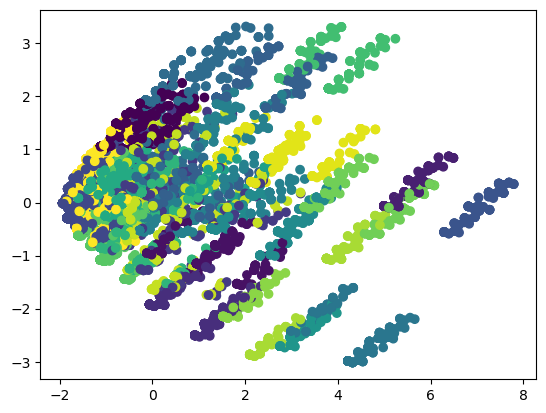

In [138]:
# Use pca and then plot

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=kmeans_results, cmap='viridis')

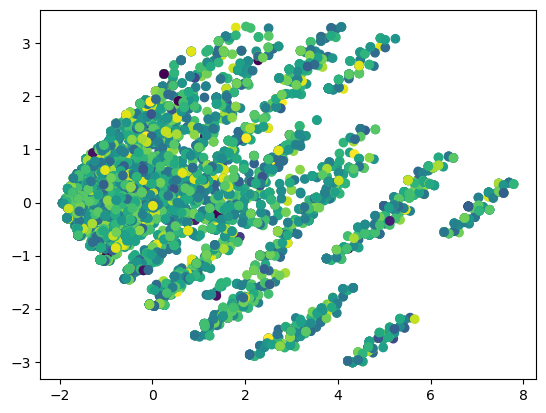

In [139]:
# plot using order hour of day as label

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=new_df['order_hour_of_day'], cmap='viridis')

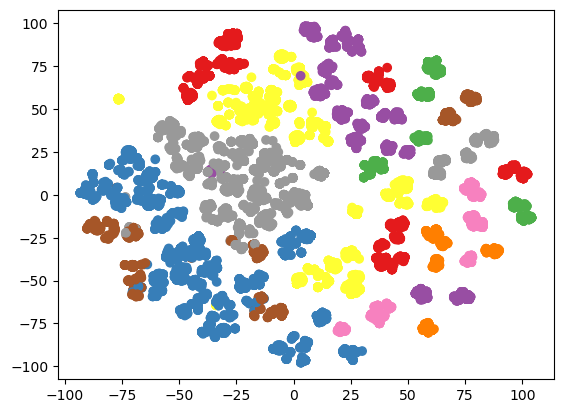

In [140]:
# Show the rows in a scatter plot
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='pca', perplexity=25).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=kmeans_results, cmap='Set1')




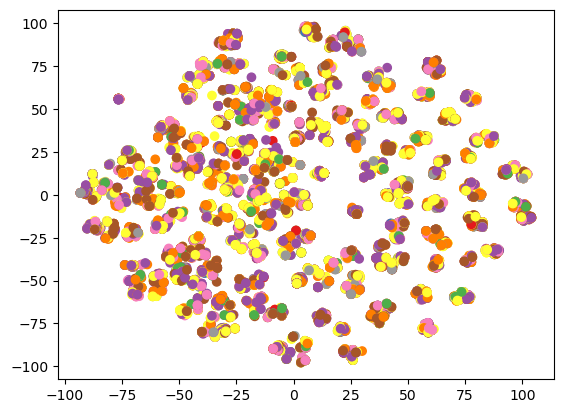

In [141]:
plt.scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=new_df['order_hour_of_day'], cmap='Set1')

In [142]:
# Lets create a mapping of the hours into 4 categories
# 0-6: Night
# 7-12: Morning
# 13-18: Afternoon
# 19-23: Evening

# Use that grouping to form new labels and perform clustering again
new_df['order_hour_of_day_grouped'] = new_df['order_hour_of_day'].apply(lambda x: 0 if x<=6 else 1 if x<=12 else 2 if x<=18 else 3)
print(new_df.head())

# Create 4 clusters
from sklearn.cluster import KMeans

X = new_df.iloc[:, :-2]
kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_

# Calculate the silhouette score
from sklearn.metrics import silhouette_score

print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")

# Calculate the calinski harabasz score
from sklearn.metrics import calinski_harabasz_score

print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")

# Calculate the davies bouldin score
from sklearn.metrics import davies_bouldin_score

print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")

# Calculate the adjusted rand index
from sklearn.metrics import adjusted_rand_score

print(f"Adjusted Rand Index: {adjusted_rand_score(new_df['order_hour_of_day_grouped'] , kmeans_results)}")


          (bakery)  (beverages)  (breakfast)  (canned goods)  (dairy eggs)  \
order_id                                                                     
2513124          0            0            0               0             0   
551298           0            0            1               0             0   
165311           1            1            0               0             1   
76294            1            0            0               0             1   
90358            1            1            0               0             1   

          (deli)  (dry goods pasta)  (frozen)  (household)  (meat seafood)  \
order_id                                                                     
2513124        1                  0         0            0               0   
551298         0                  0         0            0               0   
165311         1                  0         0            0               0   
76294          1                  0         0            0     

Text(0.5, 1.0, 'Predicted Label')

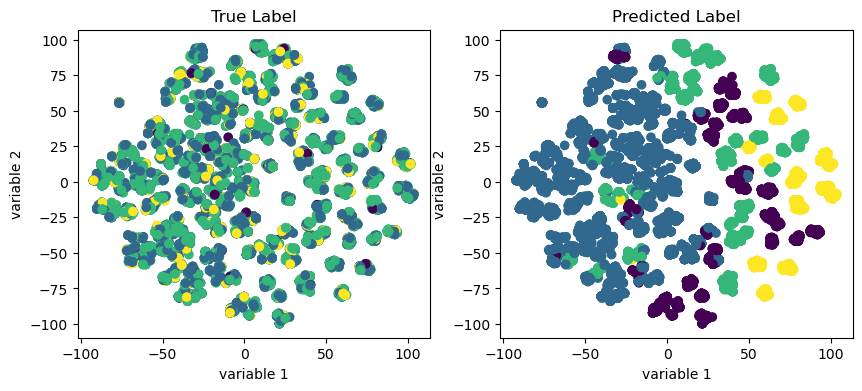

In [143]:
# Scatter plot using tsne
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='pca', perplexity=25).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

# Plot two graphs, one using true label and one using predicted label
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=new_df['order_hour_of_day_grouped'] ,cmap='viridis')
axes[0].set_xlabel("variable 1")
axes[0].set_ylabel("variable 2")
axes[0].set_title("True Label")
axes[1].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=kmeans_results, cmap='viridis')
axes[1].set_xlabel("variable 1")
axes[1].set_ylabel("variable 2")
axes[1].set_title("Predicted Label")


Text(0.5, 1.0, 'Predicted Label')

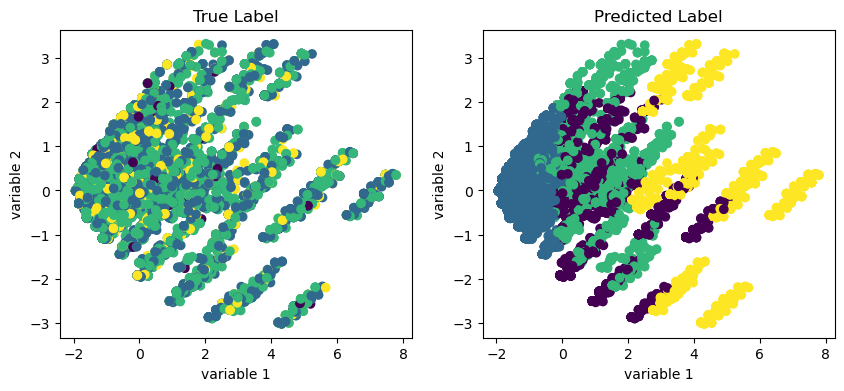

In [144]:
# Scatter plot using pca
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

# Plot two graphs, one using true label and one using predicted label
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=new_df['order_hour_of_day_grouped'] ,cmap='viridis')
axes[0].set_xlabel("variable 1")
axes[0].set_ylabel("variable 2")
axes[0].set_title("True Label")

axes[1].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=kmeans_results, cmap='viridis')
axes[1].set_xlabel("variable 1")
axes[1].set_ylabel("variable 2")
axes[1].set_title("Predicted Label")


In [145]:
# Add user_id to the new_df on new_df index and df_orders order_id

new_df_user = new_df.merge(df_orders[['order_id', 'user_id']], how='left', left_index=True, right_on='order_id').set_index('order_id')
new_df_user.head()

# Get number of unique users
len(new_df_user['user_id'].unique())




9503

In [146]:
new_df_user['user_id'].value_counts()

user_id
118129    4
52962     3
11661     3
75805     3
5296      3
         ..
108390    1
51631     1
74886     1
62239     1
115113    1
Name: count, Length: 9503, dtype: int64

In [148]:
# Create 9503 clusters
from sklearn.cluster import KMeans

X = new_df_user.iloc[:, :-3]
kmeans = KMeans(n_clusters=9503, random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_

# Calculate the silhouette score
from sklearn.metrics import silhouette_score

print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")
# Calculate the calinski harabasz score
from sklearn.metrics import calinski_harabasz_score

print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")
# Calculate the davies bouldin score
from sklearn.metrics import davies_bouldin_score

print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")
# Calculate the adjusted rand index
from sklearn.metrics import adjusted_rand_score

print(f"Adjusted Rand Index: {adjusted_rand_score(new_df_user['user_id'] , kmeans_results)}")

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Users/parkhiagarwal/opt/anaconda3/envs/dataProducts/lib/python3.9/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Users/parkhiagarwal/opt/anaconda3/envs/dataProducts/lib/python3.9/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

## Miscalenous (If I group by user then multiple orders are clubbed together which is not what I want since I want to cluster users based on their orders) 

In [128]:
# Do the same as above but use user id for grouping
df_merged_user = df_merged.merge(df_orders, how='left', on='order_id')

# merge with department
df_merged_user = df_merged_user.merge(df_departments, how='left', on='department_id')
df_merged_user.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry


In [129]:
# Convert df_merged_user into transactional format
transactional_data_user = df_merged_user.groupby(['user_id'])['department'].apply(list)

te = TransactionEncoder()
te_ary = te.fit(transactional_data_user).transform(transactional_data_user, sparse=True)
sparse_df_user = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_, index=transactional_data_user.index)
sparse_df_user.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,True,True
2,0,0,1,1,1,0,1,1,1,0,...,0,1,1,0,0,1,1,0,True,True
3,0,0,0,1,0,0,0,1,1,1,...,1,0,0,0,0,1,0,0,True,True
4,1,0,1,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,True,True
5,0,0,0,0,0,0,1,1,1,1,...,0,1,0,0,0,1,0,0,True,True


In [130]:
sparse_df_user.shape

(206209, 21)

In [105]:
sparse_df_user.columns

Index(['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk',
       'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen',
       'household', 'international', 'meat seafood', 'missing', 'other',
       'pantry', 'personal care', 'pets', 'produce', 'snacks'],
      dtype='object')

In [131]:

# Apply Apriori algorithm on sparse_df_user
#frequent_itemsets_user = algorithm.apriori(sparse_df_user, min_support=0.001, use_colnames=True)
# Random sample of 1000 rows
algorithm = Apriori()
sample = sparse_df_user.sample(n=10000, random_state=1)
frequent_itemsets_user = algorithm.apriori(df=sample, use_colnames=True, verbose=1, count=False, min_support=0.7)

# Print the frequent itemsets
print(frequent_itemsets_user)


Processing 24 combinations | Sampling itemset size 4
    support                               itemsets
0    0.8360                            (beverages)
1    0.9250                           (dairy eggs)
2    0.7954                               (frozen)
3    0.8374                               (pantry)
4    0.9381                              (produce)
5    0.8448                               (snacks)
6    0.7880                (dairy eggs, beverages)
7    0.7242                    (pantry, beverages)
8    0.7897                   (beverages, produce)
9    0.7350                    (snacks, beverages)
10   0.7658                   (dairy eggs, frozen)
11   0.8068                   (pantry, dairy eggs)
12   0.8881                  (dairy eggs, produce)
13   0.8005                   (snacks, dairy eggs)
14   0.7115                       (pantry, frozen)
15   0.7682                      (produce, frozen)
16   0.7056                       (snacks, frozen)
17   0.8087                  

In [132]:
# Use frequent_itemsets on sparse_df_user
new_df = pd.DataFrame(index=sample.index)
new_col = frequent_itemsets_user['itemsets'].tolist()
new_df[new_col] = 1
for itemset in tqdm(new_col):
    for i in sample.index:
        for item in itemset:
            if sample.loc[i][item] == 0:
                new_df.at[i, itemset] = 0
                break

new_df.head()




100%|██████████| 31/31 [05:58<00:00, 11.56s/it]


,(beverages),(dairy eggs),(frozen),(pantry),(produce),(snacks),"(dairy eggs, beverages)","(pantry, beverages)","(beverages, produce)","(snacks, beverages)",...,"(beverages, dairy eggs, produce)","(snacks, dairy eggs, beverages)","(beverages, pantry, produce)","(beverages, snacks, produce)","(dairy eggs, produce, frozen)","(pantry, dairy eggs, produce)","(pantry, snacks, dairy eggs)","(snacks, dairy eggs, produce)","(pantry, snacks, produce)","(pantry, snacks, dairy eggs, produce)"
user_id,,,,,,,,,,,,,,,,,,,,,
110192,1,1,1,0,1,1,1,0,1,1,...,1,1,0,1,1,0,0,1,0,0
33116,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
115998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
183157,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
86976,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [133]:
# Add order hour of day to the new_df on new_df index and df_orders order_id
new_df = new_df.merge(df_orders[['user_id', 'order_hour_of_day']], how='left', left_index=True, right_on='user_id').set_index('user_id')
new_df.head()


,(beverages),(dairy eggs),(frozen),(pantry),(produce),(snacks),"(dairy eggs, beverages)","(pantry, beverages)","(beverages, produce)","(snacks, beverages)",...,"(snacks, dairy eggs, beverages)","(beverages, pantry, produce)","(beverages, snacks, produce)","(dairy eggs, produce, frozen)","(pantry, dairy eggs, produce)","(pantry, snacks, dairy eggs)","(snacks, dairy eggs, produce)","(pantry, snacks, produce)","(pantry, snacks, dairy eggs, produce)",order_hour_of_day
user_id,,,,,,,,,,,,,,,,,,,,,
110192,1,1,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,0,0,11
110192,1,1,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,0,0,13
110192,1,1,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,0,0,20
110192,1,1,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,0,0,20
33116,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,13


In [ ]:

# Create 24 clusters
from sklearn.cluster import KMeans

X = new_df.iloc[:, :-1]
kmeans = KMeans(n_clusters=24, random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_

# Calculate the silhouette score
from sklearn.metrics import silhouette_score

print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")

# Calculate the calinski harabasz score
from sklearn.metrics import calinski_harabasz_score

print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")

# Calculate the davies bouldin score
from sklearn.metrics import davies_bouldin_score

print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")

# Calculate the adjusted rand index
from sklearn.metrics import adjusted_rand_score

print(f"Adjusted Rand Index: {adjusted_rand_score(new_df['order_hour_of_day'] , kmeans_results)}")

In [45]:
sample = sparse_df.sample(n=10000, random_state=1)
# Apply Apriori algorithm on sparse_df_aisle
#frequent_itemsets_aisle = algorithm.apriori(sparse_df_aisle, min_support=0.001, use_colnames=True)
# Random sample of 1000 rows
algorithm = Apriori()
frequent_itemsets_product = algorithm.apriori(df=sample, use_colnames=True, verbose=1, count=False, min_support=0.02)
# Print the frequent itemsets
print(frequent_itemsets_product)

Processing 1640 combinations | Sampling itemset size 2
    support                                        itemsets
0    0.0266                      (Apple Honeycrisp Organic)
1    0.1224                        (Bag of Organic Bananas)
2    0.1471                                        (Banana)
3    0.0213                                       (Carrots)
4    0.0328                                (Cucumber Kirby)
5    0.0230                             (Fresh Cauliflower)
6    0.0200                             (Green Bell Pepper)
7    0.0219                                   (Half & Half)
8    0.0251                              (Honeycrisp Apple)
9    0.0463                                   (Large Lemon)
10   0.0440                                         (Limes)
11   0.0200                         (Michigan Organic Kale)
12   0.0551                               (Organic Avocado)
13   0.0237                          (Organic Baby Arugula)
14   0.0240                          (Organic

In [49]:
new_df = pd.DataFrame(index=sample.columns)
new_col = frequent_itemsets_product['itemsets'].tolist()
new_df[new_col] = 1
for itemset in tqdm(new_col):
    for item in sample.columns:
        if item not in itemset:
            new_df.at[item, itemset] = 0

100%|██████████| 42/42 [00:32<00:00,  1.30it/s]


In [54]:
new_df.index.name = 'product_name'

In [56]:
final_df2 = new_df.merge(df_products[['product_name', 'department_id']], how='left', on='product_name').set_index('product_name')
final_df2.rename(columns={"department_id": "Label"}, inplace=True)

In [64]:
print(final_df2.shape)
final_df2.head()

(49677, 43)


,(Apple Honeycrisp Organic),(Bag of Organic Bananas),(Banana),(Carrots),(Cucumber Kirby),(Fresh Cauliflower),(Green Bell Pepper),(Half & Half),(Honeycrisp Apple),(Large Lemon),...,(Organic Whole Milk),(Organic Yellow Onion),(Organic Zucchini),(Original Hummus),(Seedless Red Grapes),(Sparkling Water Grapefruit),(Strawberries),(Yellow Onions),"(Organic Strawberries, Bag of Organic Bananas)",Label
product_name,,,,,,,,,,,,,,,,,,,,,
#2 Coffee Filters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
#2 Cone White Coffee Filters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
#2 Mechanical Pencils,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
#4 Natural Brown Coffee Filters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
& Go! Hazelnut Spread + Pretzel Sticks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


### K Means Clustering (K=21)

In [59]:
print("Number of unique labels: ", len(final_df2['Label'].unique()))

Number of unique labels:  21


In [61]:
from sklearn.cluster import KMeans

X = final_df2.iloc[:, :-1]
kmeans = KMeans(n_clusters=len(final_df2['Label'].unique()), random_state=0, init='k-means++').fit(X)
kmeans_results = kmeans.labels_

In [63]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(final_df2['Label'] , kmeans_results)}")

Silhouette Score: 0.9988758729077895
Calinski Harabasz Score: 2601.023852659609
Davies Bouldin Score: 0.0005007685751385189
Adjusted Rand Index: 6.573929271354518e-05


#### t-SNE

In [65]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='pca', perplexity=50).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded)
X_embedded.shape

(49677, 2)

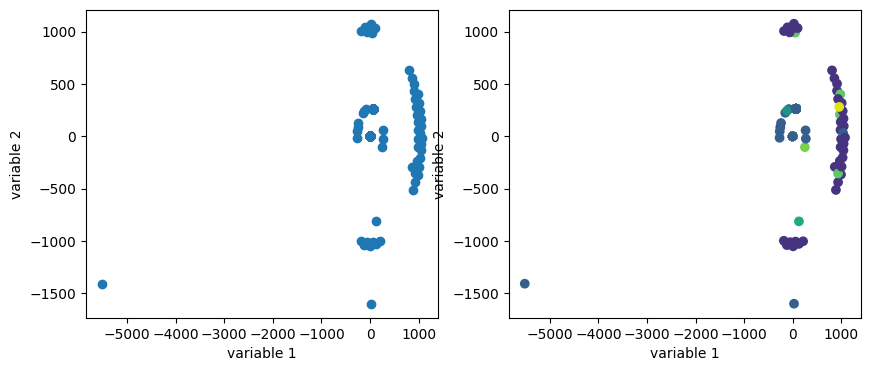

In [66]:
# t-SNE does not result in clear clusters too

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], cmap='viridis')
axes[0].set_xlabel("variable 1")
axes[0].set_ylabel("variable 2")
axes[1].scatter(x=X_embedded.iloc[:, 0], y=X_embedded.iloc[:, 1], c=final_df2['Label'], cmap='viridis')
axes[1].set_xlabel("variable 1")
axes[1].set_ylabel("variable 2")
plt.show()

In [71]:
kmeans = KMeans(n_clusters=len(final_df2['Label'].unique()), random_state=0, init='k-means++').fit(X_embedded)
kmeans_results = kmeans.labels_

In [72]:
print(f"Silhouette Score: {silhouette_score(X, kmeans_results, metric='euclidean')}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, kmeans_results)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(X, kmeans_results)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(final_df2['Label'] , kmeans_results)}")

Silhouette Score: -0.00025852784246296775
Calinski Harabasz Score: 1095.68550674227
Davies Bouldin Score: 2.2292469141206253
Adjusted Rand Index: 2.730699322060483e-05
